### 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).


In [76]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
import keras
import seaborn as sns; 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.ticker as ticker


In [8]:
data = fetch_openml('Fashion-MNIST', as_frame=False, parser='auto')

In [9]:
list(data)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [10]:
print(data.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [11]:
data.data.shape

(70000, 784)

In [12]:
data.target.shape

(70000,)

In [13]:
X = data.data
y = to_categorical(data.target)

In [52]:
def plot_image(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

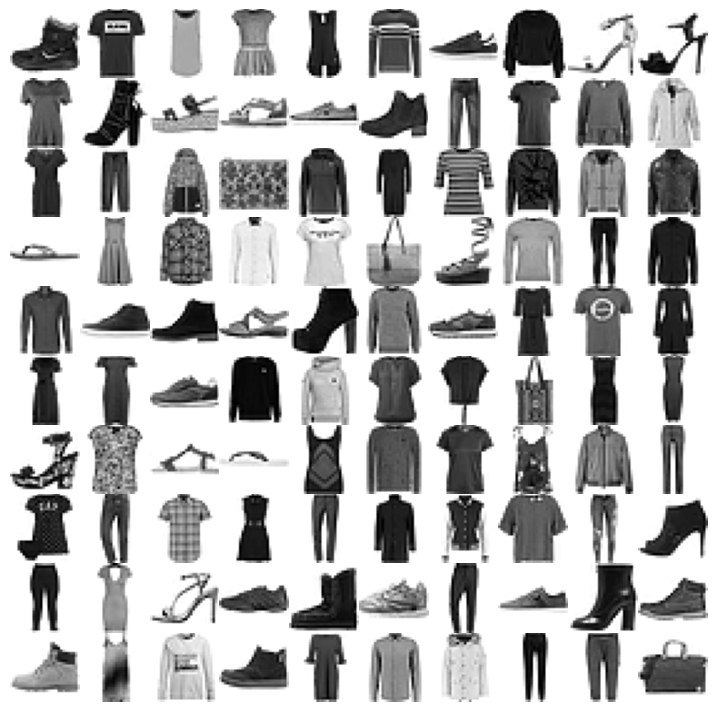

In [16]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_image(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### 2. Train a dense neural network using Keras

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train = X_train.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
X_test = X_test.reshape((10000, 28 * 28))

X_train = X_train.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
X_test = X_test.astype("float32") / 255

In [43]:
def make_model(model_params):
    model = Sequential()

    if len(model_params['layers']) == 0:
        model.add(Dense(model_params['output'], input_dim=model_params['input'], activation='softmax'))

    else:
        model.add(Dense(model_params['layers'][-1], input_dim=model_params['input'], activation='relu'))
        
        for i in range(len(model_params['layers']) - 1):
            model.add(Dense(i, activation='relu'))

        model.add(Dense(10, activation='softmax'))

    return model
        

In [44]:
def fit_model(model, epochs, batch_size, verbose):
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model, history

In [45]:

def one_hot_to_label(one_hot):
    label = list()

    for i in range(len(one_hot)):
        label.append(np.argmax(one_hot[i]))

    return label

In [116]:
def evaluate_model(y_test, y_pred, labels):
  y_pred = one_hot_to_label(y_pred)
  y_test = one_hot_to_label(y_test)
  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)

  sns.heatmap(cm.T, square=True, annot=True, fmt='d', xticklabels = labels, yticklabels = labels)
  plt.xlabel('true label')
  plt.ylabel('predicted label')
  plt.show()

In [95]:
def evaluate_histories(histories, models):
    _,(ax1,ax2)=plt.subplots(2,figsize=(8,10))

    ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    for i in range(len(histories)):
        val_acc = histories[i].history['accuracy']
        val_loss = histories[i].history['loss']
        ax1.plot(val_acc, label=models[i])
        ax2.plot(val_loss, label=models[i])
    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('Loss')
    ax1.set_xlabel('Epochs')
    ax2.set_xlabel('Epochs')
    ax1.legend()
    ax2.legend()
    plt.show()  

In [81]:
def build_and_evaluate_model(model_params):
    model = make_model(model_params)
    model, history = fit_model(model,model_params['epochs'], model_params['batch_size'], model_params['verbose'] )
    y_pred = model.predict(X_test, verbose=0)
    evaluate_model(y_test, y_pred, model_params['labels'])
    return history

In [114]:
def build_and_evaluate_models(models):
    params = {
        'labels': ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],
        'epochs': 100,
        'batch_size': 128,
        'input': 784,
        'output': 10,
        'verbose': 0
    }

    histories = []

    for model in models:
        print(model)
        params['layers'] = model
        histories.append(build_and_evaluate_model(params))
    evaluate_histories(histories, models)

[128]


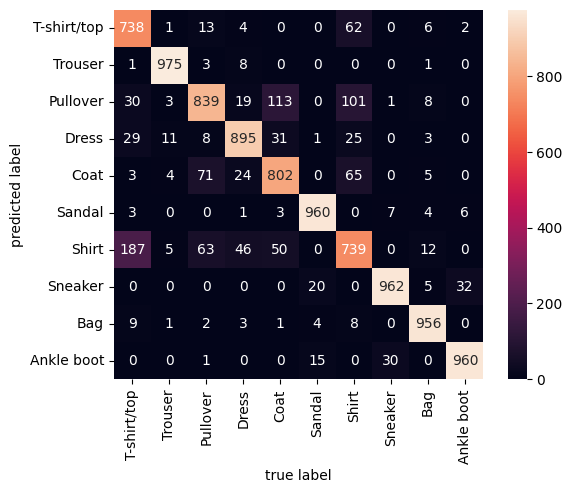

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.84      0.79      1000
           3       0.89      0.90      0.89      1000
           4       0.82      0.80      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.67      0.74      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000

[300]


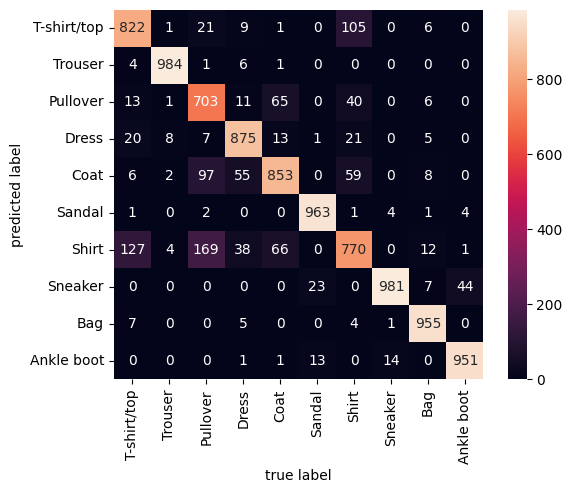

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.70      0.76      1000
           3       0.92      0.88      0.90      1000
           4       0.79      0.85      0.82      1000
           5       0.99      0.96      0.97      1000
           6       0.65      0.77      0.70      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.95      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[400]


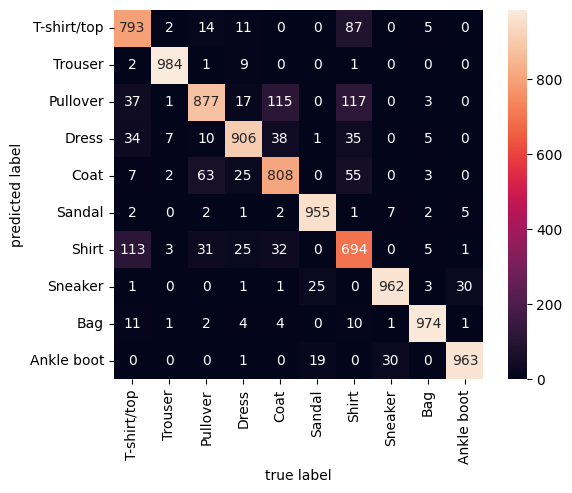

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1000
           1       0.99      0.98      0.99      1000
           2       0.75      0.88      0.81      1000
           3       0.87      0.91      0.89      1000
           4       0.84      0.81      0.82      1000
           5       0.98      0.95      0.97      1000
           6       0.77      0.69      0.73      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[512]


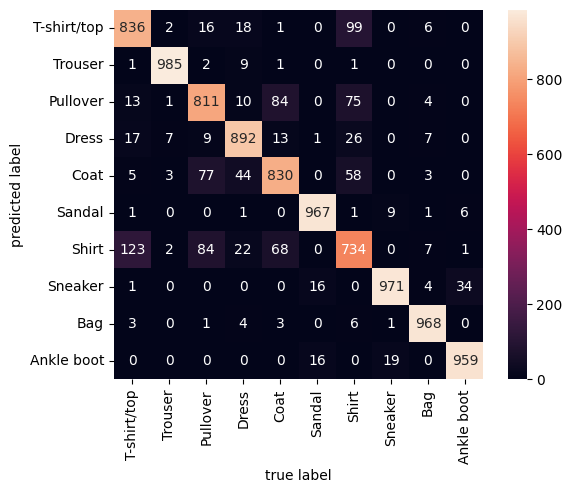

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.81      0.81      1000
           3       0.92      0.89      0.90      1000
           4       0.81      0.83      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.73      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

[600]


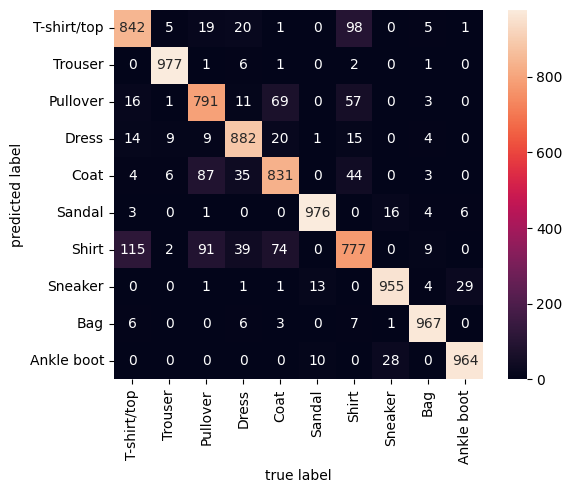

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.79      0.81      1000
           3       0.92      0.88      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.98      0.97      1000
           6       0.70      0.78      0.74      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



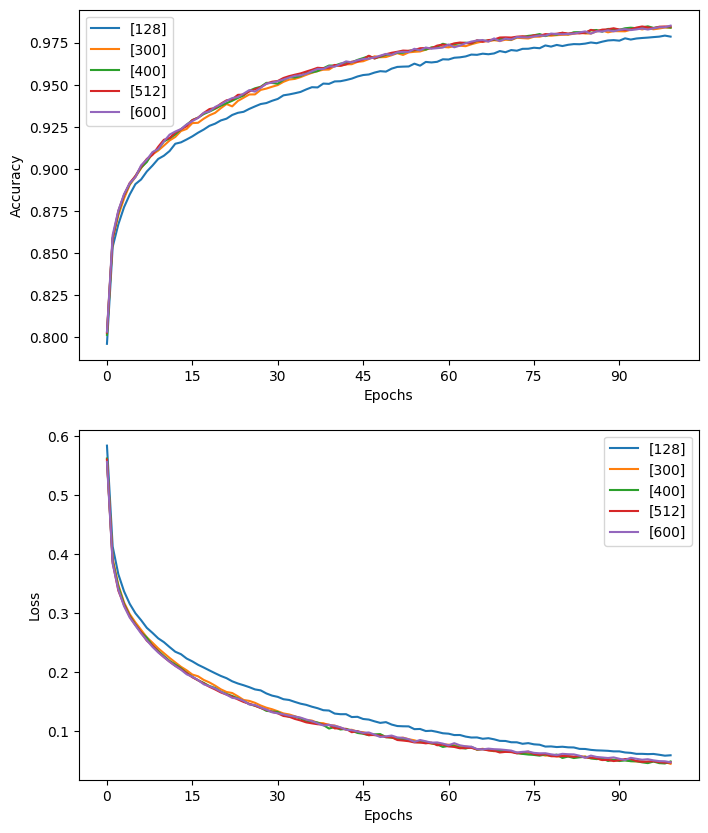

In [115]:
models = [[128],[300],[400],[512],[600]]

build_and_evaluate_models(models)

It is interesting to see that where it got confused is between similar items. The shirt is mainly confused with T-shirt/top, pullover, coat, and dress. All of these are, for the most part, the same shape and reflects in the precision and recall values; they are the lowest across the board. On the other hand, the item with the best scores is the most unique out of the list, trousers.